In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [4]:
# reading files to variables
df = pd.DataFrame()
files = glob.glob("data/*.txt")
course_data = glob.glob("data/uc.berkeley.student.course.data.*.txt")
majors = glob.glob("data/uc.berkeley.student.majors.*.txt")
pathways = glob.glob("data/uc.berkeley.stem.*.txt")

In [9]:
pathways

['data/uc.berkeley.stem.pathways.2007.2018.txt',
 'data/uc.berkeley.stem.pathways.2007.2017.txt']

In [13]:
stem2017 = pd.read_table(pathways[1])
stem2018 = pd.read_table(pathways[0])
data2017 = stem2017.groupby(['year','ethnic.l1']).count().unstack()['ppsk']
data2018 = stem2018.groupby(['year','ethnic.l1']).count().unstack()['ppsk']

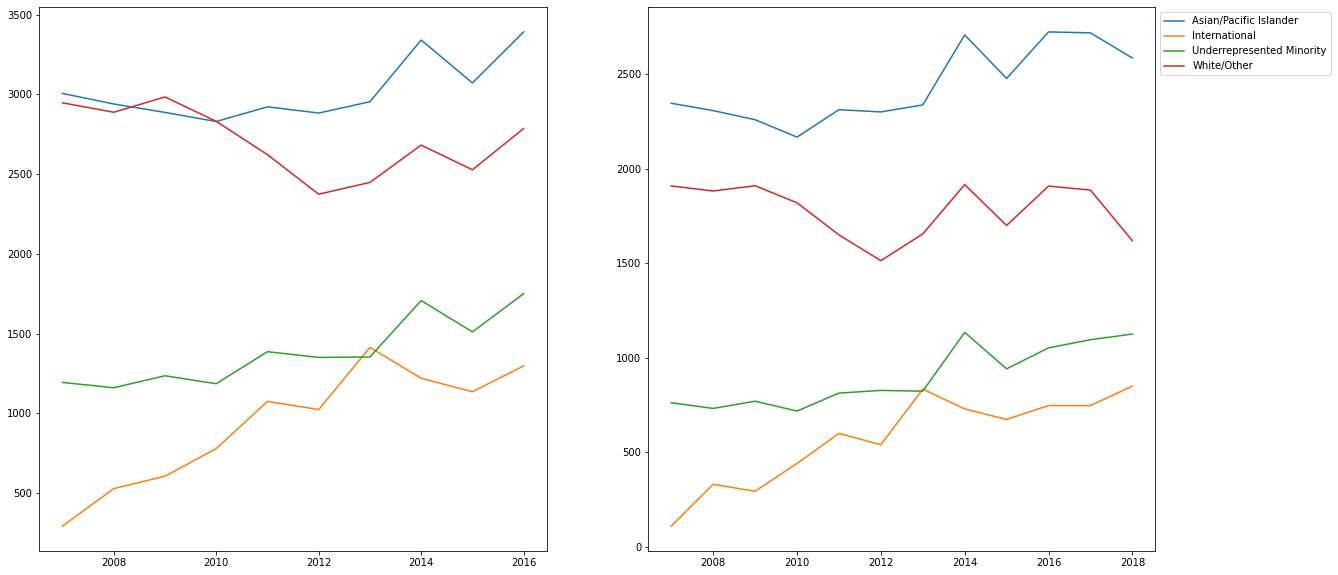

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

# STEM Pathways 2007 - 2017
ax[0].plot(data2017.index, 'Asian/Pacific Islander', data=data2017, label='Asian/Pacific Islander')
ax[0].plot(data2017.index, 'International', data=data2017, label='International')
ax[0].plot(data2017.index, 'Underrepresented Minority', data=data2017, label='Underrepresented Minority')
ax[0].plot(data2017.index, 'White/Other', data=data2017, label='White/Other')

# STEM Pathways 2007 - 2018
ax[1].plot(data2018.index, 'Asian/Pacific Islander', data=data2018, label='Asian/Pacific Islander')
ax[1].plot(data2018.index, 'International', data=data2018, label='International')
ax[1].plot(data2018.index, 'Underrepresented Minority', data=data2018, label='Underrepresented Minority')
ax[1].plot(data2018.index, 'White/Other', data=data2018, label='White/Other')

ax[1].legend(bbox_to_anchor=(1,1), loc="upper left")